In [1]:
## zip 압축 풀기

import zipfile
import os

# ZIP 파일 경로
zip_file_path = "/content/Pill Detection.v2i.yolov8.zip"
unzip_dir = "/content/Pill_Detection"  # 압축을 푼 디렉토리 경로

# ZIP 파일 풀기
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"ZIP 파일이 {unzip_dir}에 풀렸습니다.")


ZIP 파일이 /content/Pill_Detection에 풀렸습니다.


In [2]:
# yolo 설치
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 22.9 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

# 모델 로드 (YOLOv8 pre-trained 모델)
model = YOLO("yolov8n.pt")  # 작은 버전인 yolov8n.pt 사용, 필요에 따라 다른 버전으로 변경 가능

# 모델 학습
model.train(data='/content/Pill_Detection/data.yaml', epochs=10, imgsz=640, batch=16)

# 학습 완료 후, 모델 저장
model.save('/content/yolov8_pill_model')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 68.0MB/s]


Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Pill_Detection/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 24.2MB/s]


Overriding model.yaml nc=80 with nc=19

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]


AMP: checks passed ✅


train: Scanning /content/Pill_Detection/train/labels... 3447 images, 12 backgrounds, 0 corrupt: 100%|██████████| 3447/3447 [00:02<00:00, 1599.13it/s]


train: New cache created: /content/Pill_Detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/Pill_Detection/valid/labels... 328 images, 3 backgrounds, 0 corrupt: 100%|██████████| 328/328 [00:00<00:00, 974.01it/s]

val: New cache created: /content/Pill_Detection/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000435, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.25G      1.801      3.718      1.883          7        640: 100%|██████████| 216/216 [01:17<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]


                   all        328        325      0.743      0.364      0.408      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.27G      1.499       2.15      1.542          7        640: 100%|██████████| 216/216 [01:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.36it/s]

                   all        328        325      0.887      0.521      0.558      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.27G      1.455      1.662      1.511          7        640: 100%|██████████| 216/216 [01:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.61it/s]

                   all        328        325      0.833      0.602       0.63      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.27G      1.378      1.297      1.454          7        640: 100%|██████████| 216/216 [01:01<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.63it/s]


                   all        328        325      0.647      0.612      0.663      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.27G      1.302      1.057      1.393          7        640: 100%|██████████| 216/216 [01:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.37it/s]

                   all        328        325      0.755      0.648      0.665      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.27G       1.26     0.9417      1.368          7        640: 100%|██████████| 216/216 [01:08<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.16it/s]

                   all        328        325      0.772      0.649       0.71      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.27G        1.2     0.8383      1.329          7        640: 100%|██████████| 216/216 [01:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.48it/s]

                   all        328        325      0.759      0.724      0.723      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.27G      1.158       0.78      1.303          7        640: 100%|██████████| 216/216 [01:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.01it/s]

                   all        328        325      0.687      0.668       0.68      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.27G      1.096      0.723       1.26          7        640: 100%|██████████| 216/216 [01:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.69it/s]


                   all        328        325      0.711      0.711      0.725      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.27G      1.059      0.685      1.235          7        640: 100%|██████████| 216/216 [01:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.91it/s]

                   all        328        325      0.742      0.711      0.723      0.508



10 epochs completed in 0.194 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,353 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]


                   all        328        325      0.742      0.711      0.724      0.509
                     -        202        202      0.987          1      0.995      0.709
               - 10mg-          2          2      0.693        0.5      0.507      0.254
               - 150mg         32         32      0.978          1      0.995      0.734
            - 150mgPTP          1          1          0          0          0          0
                - 15mg          7          7      0.941          1      0.995      0.799
               - 200mg          1          1          1          0          0          0
                - 20mg         29         29      0.987          1      0.995      0.717
             - 2375mg-          8          8      0.853          1      0.995      0.764
               - 300mg         20         20      0.975          1      0.995      0.778
            - 320mgPTP         13         13          1      0.739      0.968      0.606
                 - 4m

In [4]:
# 모델 평가
metrics = model.val(data='/content/Pill_Detection/data.yaml')
print(metrics)


Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,009,353 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Pill_Detection/valid/labels.cache... 328 images, 3 backgrounds, 0 corrupt: 100%|██████████| 328/328 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.43it/s]


                   all        328        325      0.742      0.711      0.723      0.507
                     -        202        202      0.987          1      0.995      0.709
               - 10mg-          2          2      0.691        0.5      0.507      0.253
               - 150mg         32         32      0.978          1      0.995      0.734
            - 150mgPTP          1          1          0          0          0          0
                - 15mg          7          7      0.941          1      0.995      0.799
               - 200mg          1          1          1          0          0          0
                - 20mg         29         29      0.987          1      0.995      0.714
             - 2375mg-          8          8      0.852          1      0.995      0.766
               - 300mg         20         20      0.975          1      0.995      0.779
            - 320mgPTP         13         13          1      0.739      0.968       0.61
                 - 4m


image 1/1 /content/Pill_Detection/test/images/K-012685_0_0_0_1_90_100_200_png.rf.fb6411e4db6c8db894791c09e623f3b0.jpg: 640x640 1 -, 7.6ms
Speed: 2.7ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


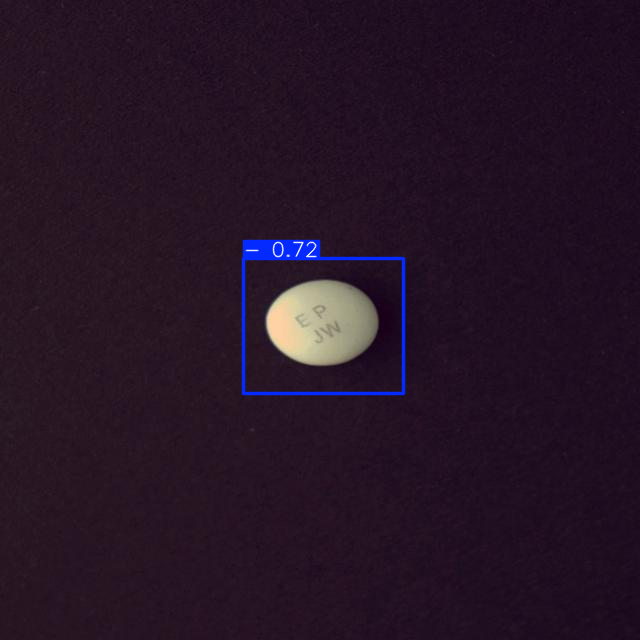

In [8]:
# 이미지 예측
results = model.predict("/content/Pill_Detection/test/images/K-012685_0_0_0_1_90_100_200_png.rf.fb6411e4db6c8db894791c09e623f3b0.jpg")

# 결과 출력
for result in results:
    result.show()  # 이미지 출력


In [21]:
from google.colab import files
import shutil

# 'runs' 디렉토리를 압축
shutil.make_archive('/content/runs_backup', 'zip', '/content/runs')

# 파일 다운로드
files.download('/content/runs_backup.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>